# Explore here

In [1]:
# Your code here
#Construccion de un modelo de regresión logística
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=';')
df.to_csv('../data/raw/raw.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
df = df.drop_duplicates().reset_index(drop=True) #Eliminacion de duplicados.
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.isnull().sum() #Revision de datos nulos.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
#EDA
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


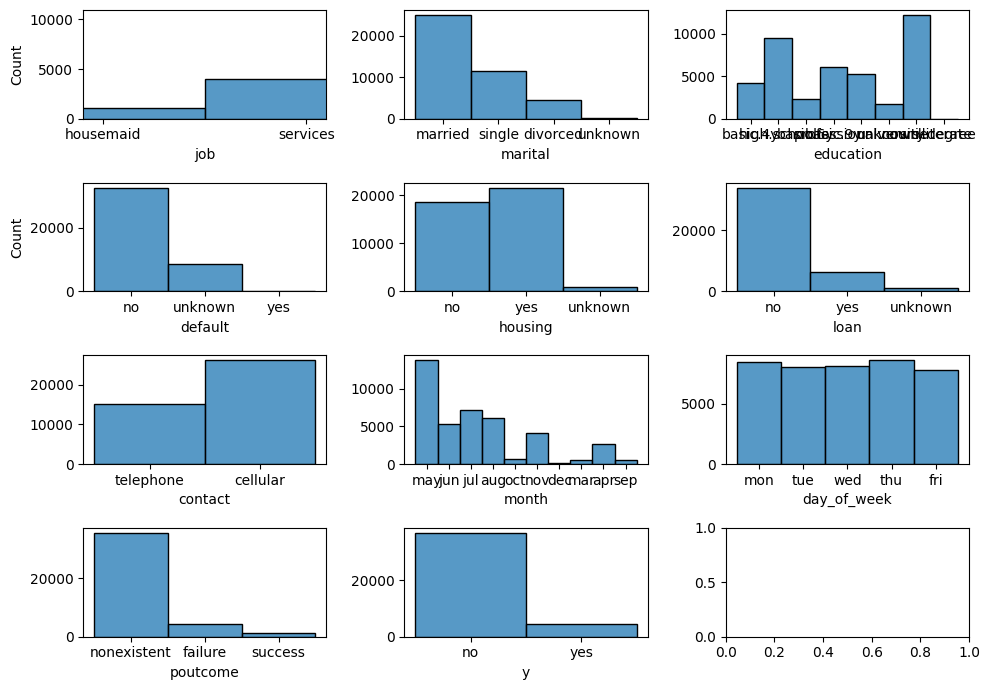

In [5]:
#Analisis Variables Categoricas
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axis = plt.subplots(4, 3, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "job").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = df, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "education").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "default")
sns.histplot(ax = axis[1, 1], data = df, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = df, x = "contact").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "month").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = df, x = "day_of_week").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = df, x = "poutcome").set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = df, x = "y").set(ylabel = None)

plt.tight_layout()
plt.show()

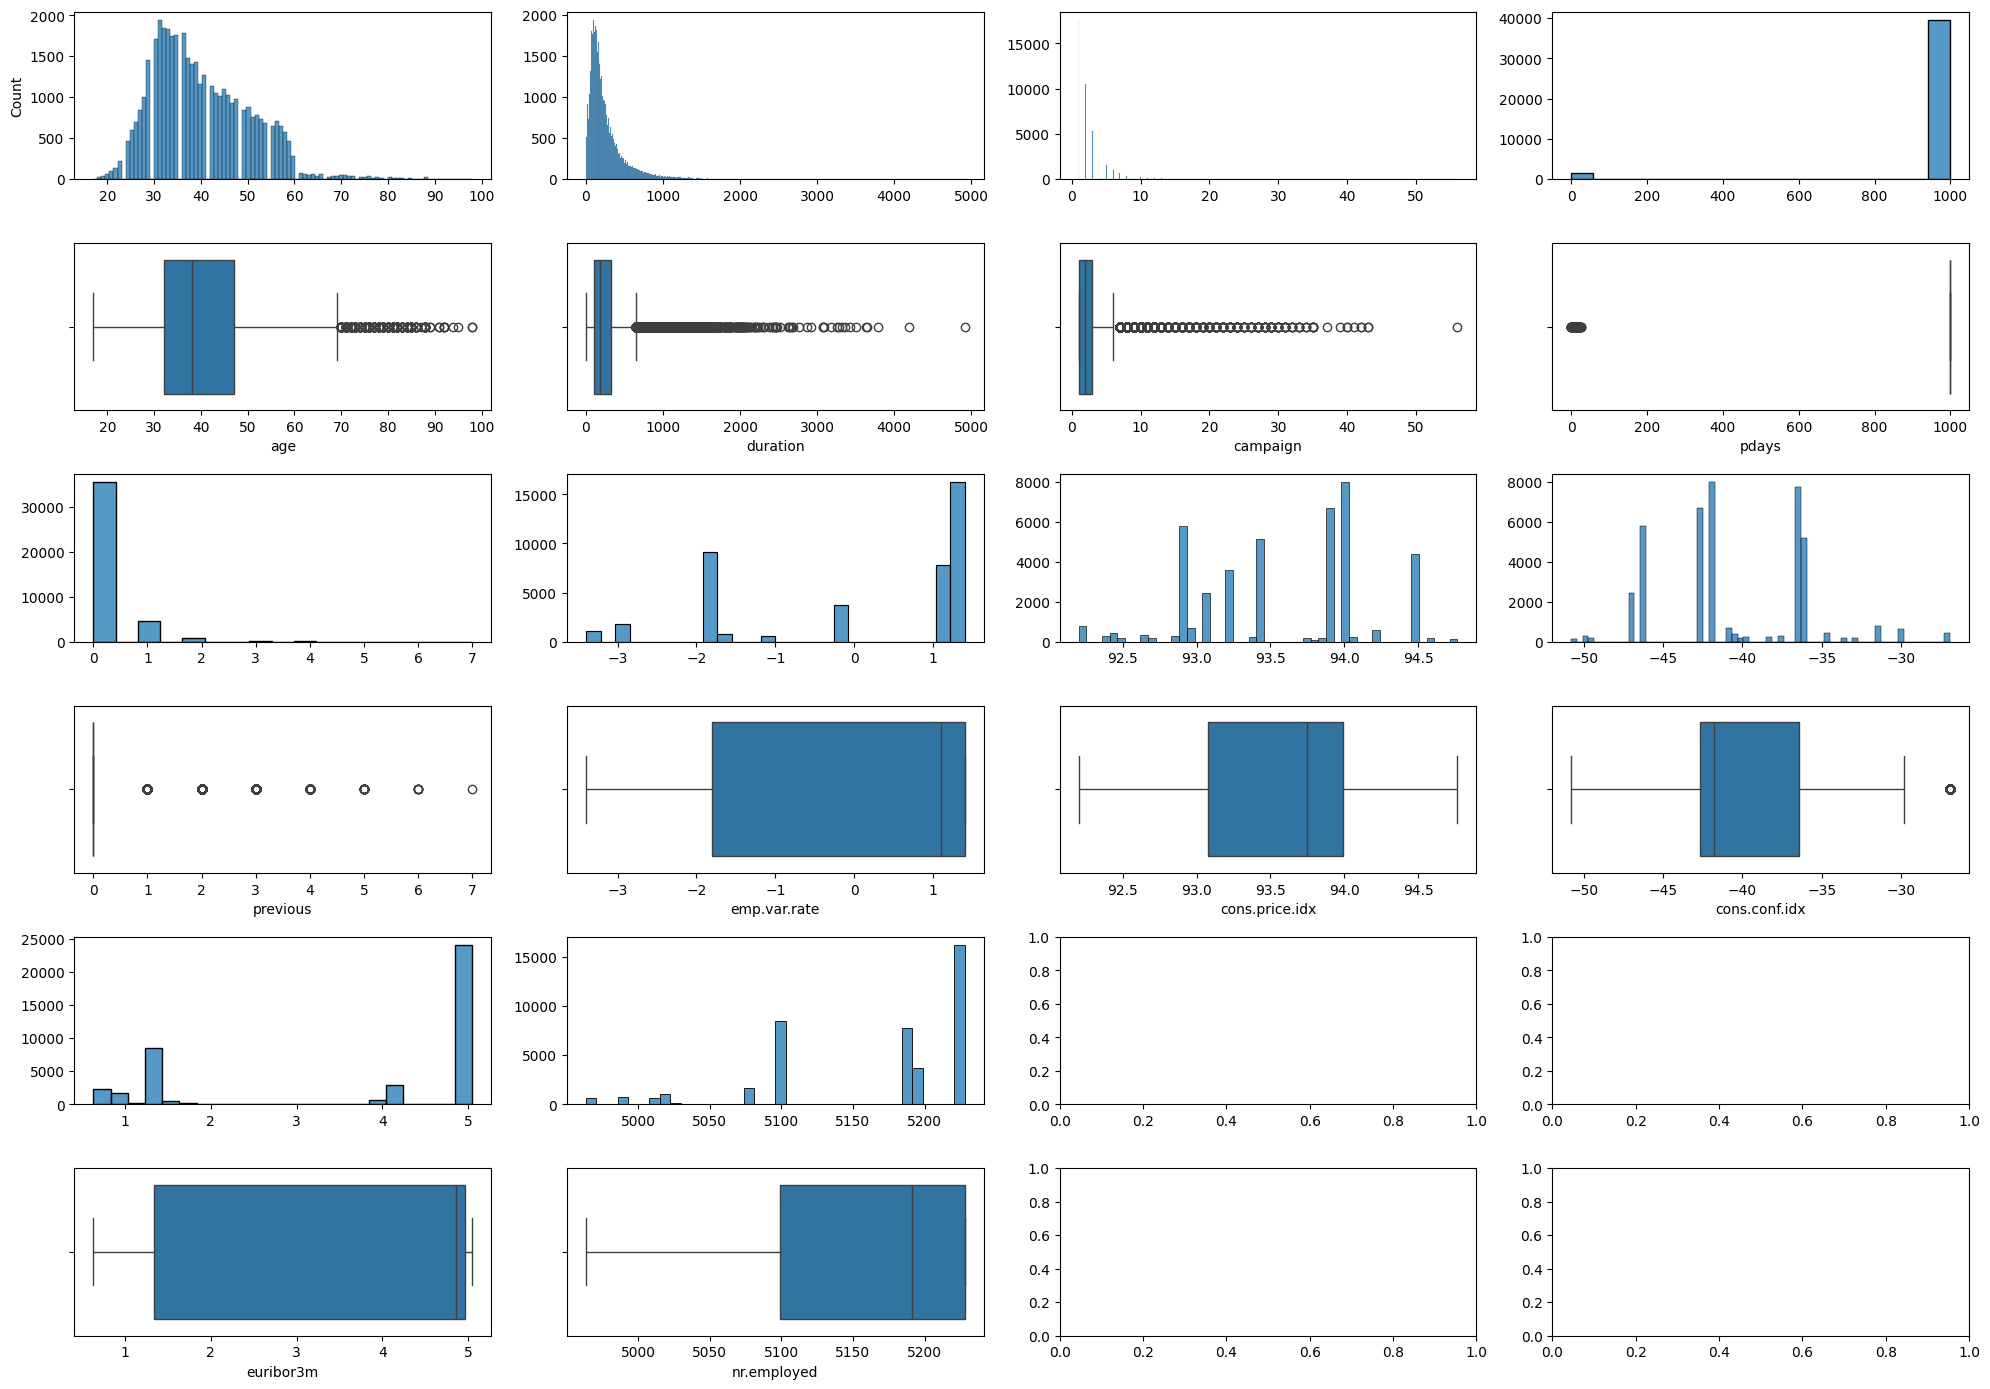

In [6]:
#Analisis Variables Numericas
fig, axis = plt.subplots(6, 4, figsize = (20, 14))

sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "duration")
sns.histplot(ax = axis[0, 2], data = df, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "campaign")
sns.histplot(ax = axis[0, 3], data = df, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "pdays")
sns.histplot(ax = axis[2, 0], data = df, x = "previous").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "previous")
sns.histplot(ax = axis[2, 1], data = df, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "emp.var.rate")
sns.histplot(ax = axis[2, 2], data = df, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = df, x = "cons.price.idx")
sns.histplot(ax = axis[2, 3], data = df, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = df, x = "cons.conf.idx")
sns.histplot(ax = axis[4, 0], data = df, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "euribor3m")
sns.histplot(ax = axis[4, 1], data = df, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "nr.employed")

plt.tight_layout()
plt.show()

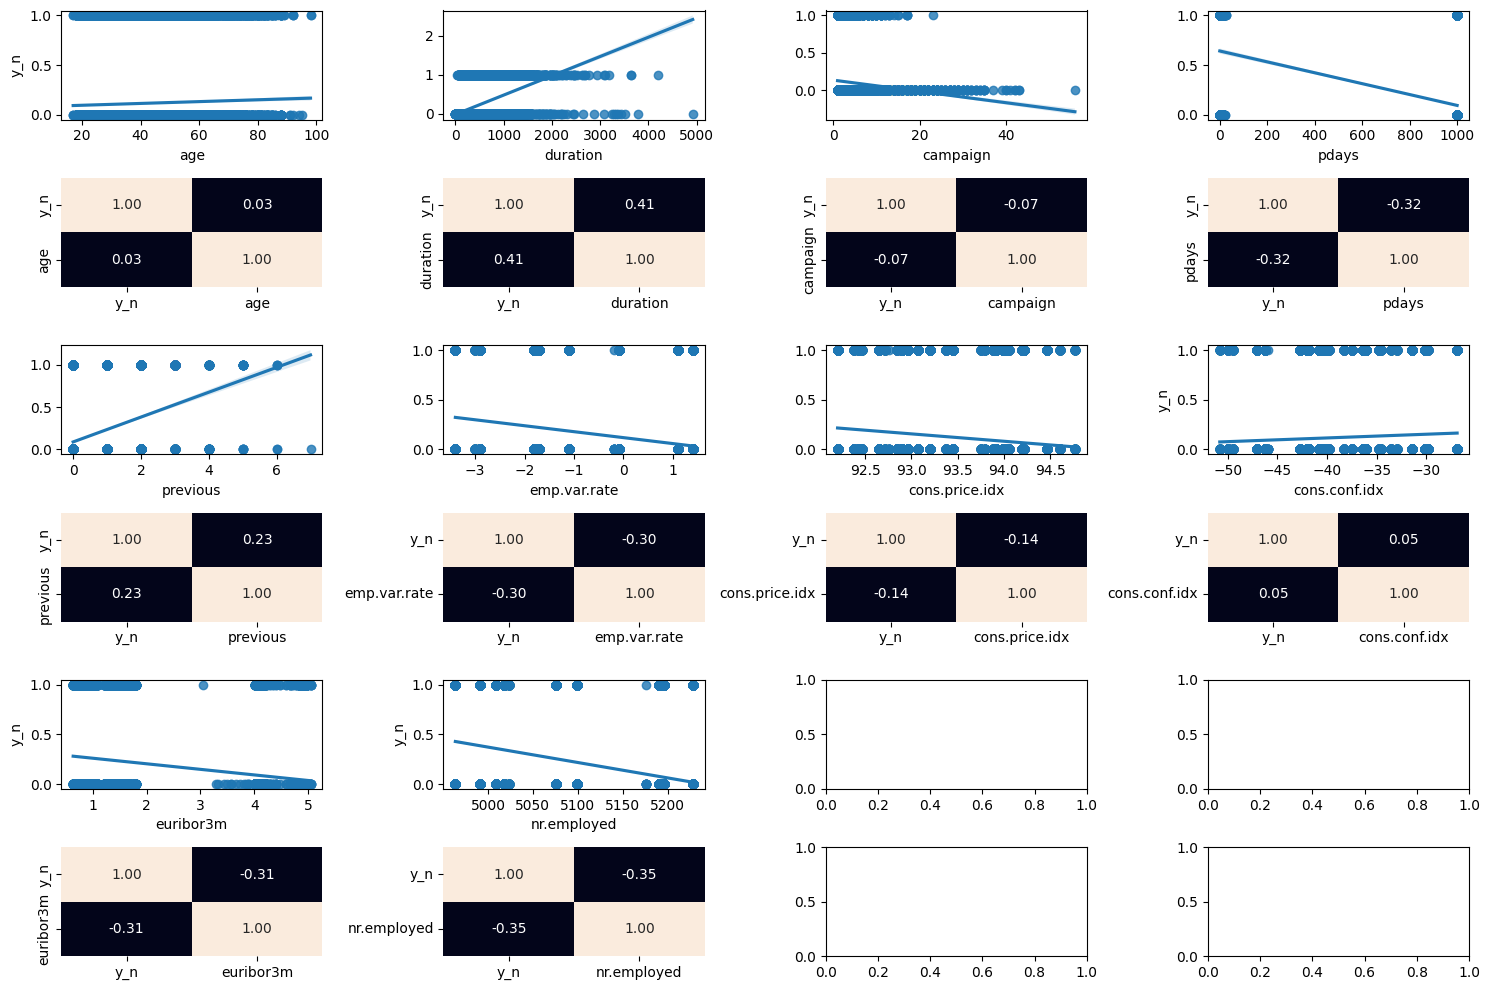

In [7]:
#Analisis numerico-numerico
df['y_n']=pd.factorize(df['y'])[0]                  #Factorizar la variable objetivo para relacionarla con las variables numericas
fig, axis = plt.subplots(6, 4, figsize = (15, 10))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "y_n")
sns.heatmap(df[["y_n", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "duration", y = "y_n").set(ylabel=None)
sns.heatmap(df[["y_n", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = df, x = "campaign", y = "y_n").set(ylabel=None)
sns.heatmap(df[["y_n", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)
sns.regplot(ax = axis[0, 3], data = df, x = "pdays", y = "y_n").set(ylabel=None)
sns.heatmap(df[["y_n", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)
sns.regplot(ax = axis[2, 0], data = df, x = "previous", y = "y_n").set(ylabel=None)
sns.heatmap(df[["y_n", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = df, x = "emp.var.rate", y = "y_n").set(ylabel=None)
sns.heatmap(df[["y_n", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)
sns.regplot(ax = axis[2, 2], data = df, x = "cons.price.idx", y = "y_n").set(ylabel=None)
sns.heatmap(df[["y_n", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)
sns.regplot(ax = axis[2, 3], data = df, x = "cons.conf.idx", y = "y_n")
sns.heatmap(df[["y_n", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3], cbar = False)
sns.regplot(ax = axis[4, 0], data = df, x = "euribor3m", y = "y_n")
sns.heatmap(df[["y_n", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)
sns.regplot(ax = axis[4, 1], data = df, x = "nr.employed", y = "y_n")
sns.heatmap(df[["y_n", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

plt.tight_layout()
plt.show()

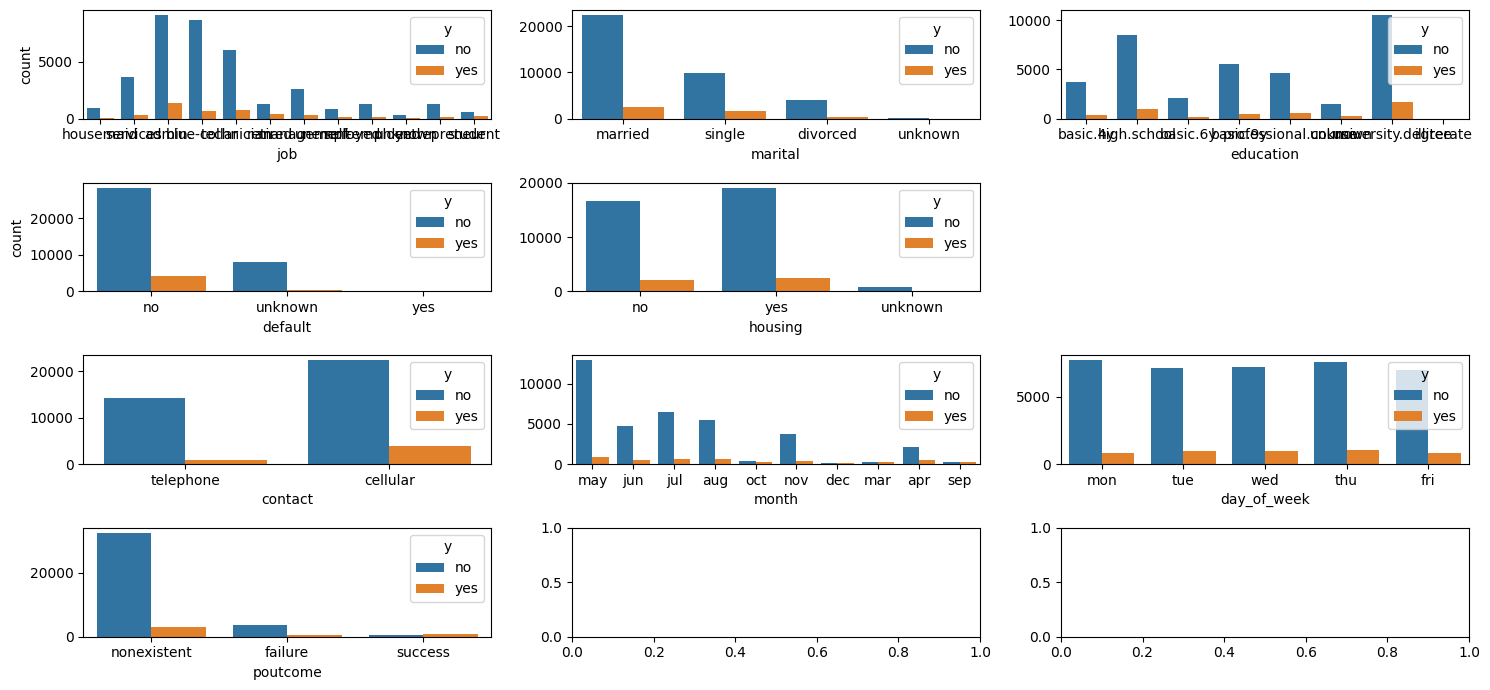

In [8]:
#Análisis categórico-categórico
fig, axis = plt.subplots(4, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = df, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = df, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = df, x = "contact", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = df, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = df, x = "day_of_week", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[3, 0], data = df, x = "poutcome", hue = "y").set(ylabel = None)


plt.tight_layout()
fig.delaxes(axis[1, 2])
plt.show()


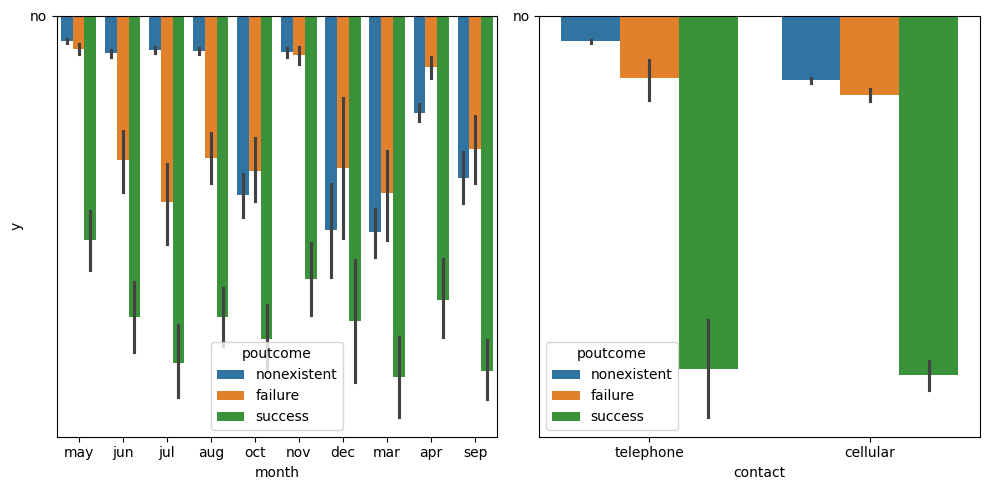

In [9]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "month", y = "y", hue = "poutcome")
sns.barplot(ax = axis[1], data = df, x = "contact", y = "y", hue = "poutcome").set(ylabel = None)

plt.tight_layout()
plt.show()

In [18]:
# Analisis de correlaciones: Volver numerico las variables categoricas
def factorizar_categoricas(df,variables_categoricas):
    for categorica in variables_categoricas:
        categorica_n= categorica+"_n"
        df[categorica_n]=pd.factorize(df[categorica])[0]
    return df

df=factorizar_categoricas(df,['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,1,1,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,1,0,1,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,2,0,2,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,5,0,4,0,1,0,1,5,4,0
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,3,0,4,0,0,0,1,5,4,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,5,0,6,0,1,0,1,5,4,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,4,0,4,0,0,0,1,5,4,0


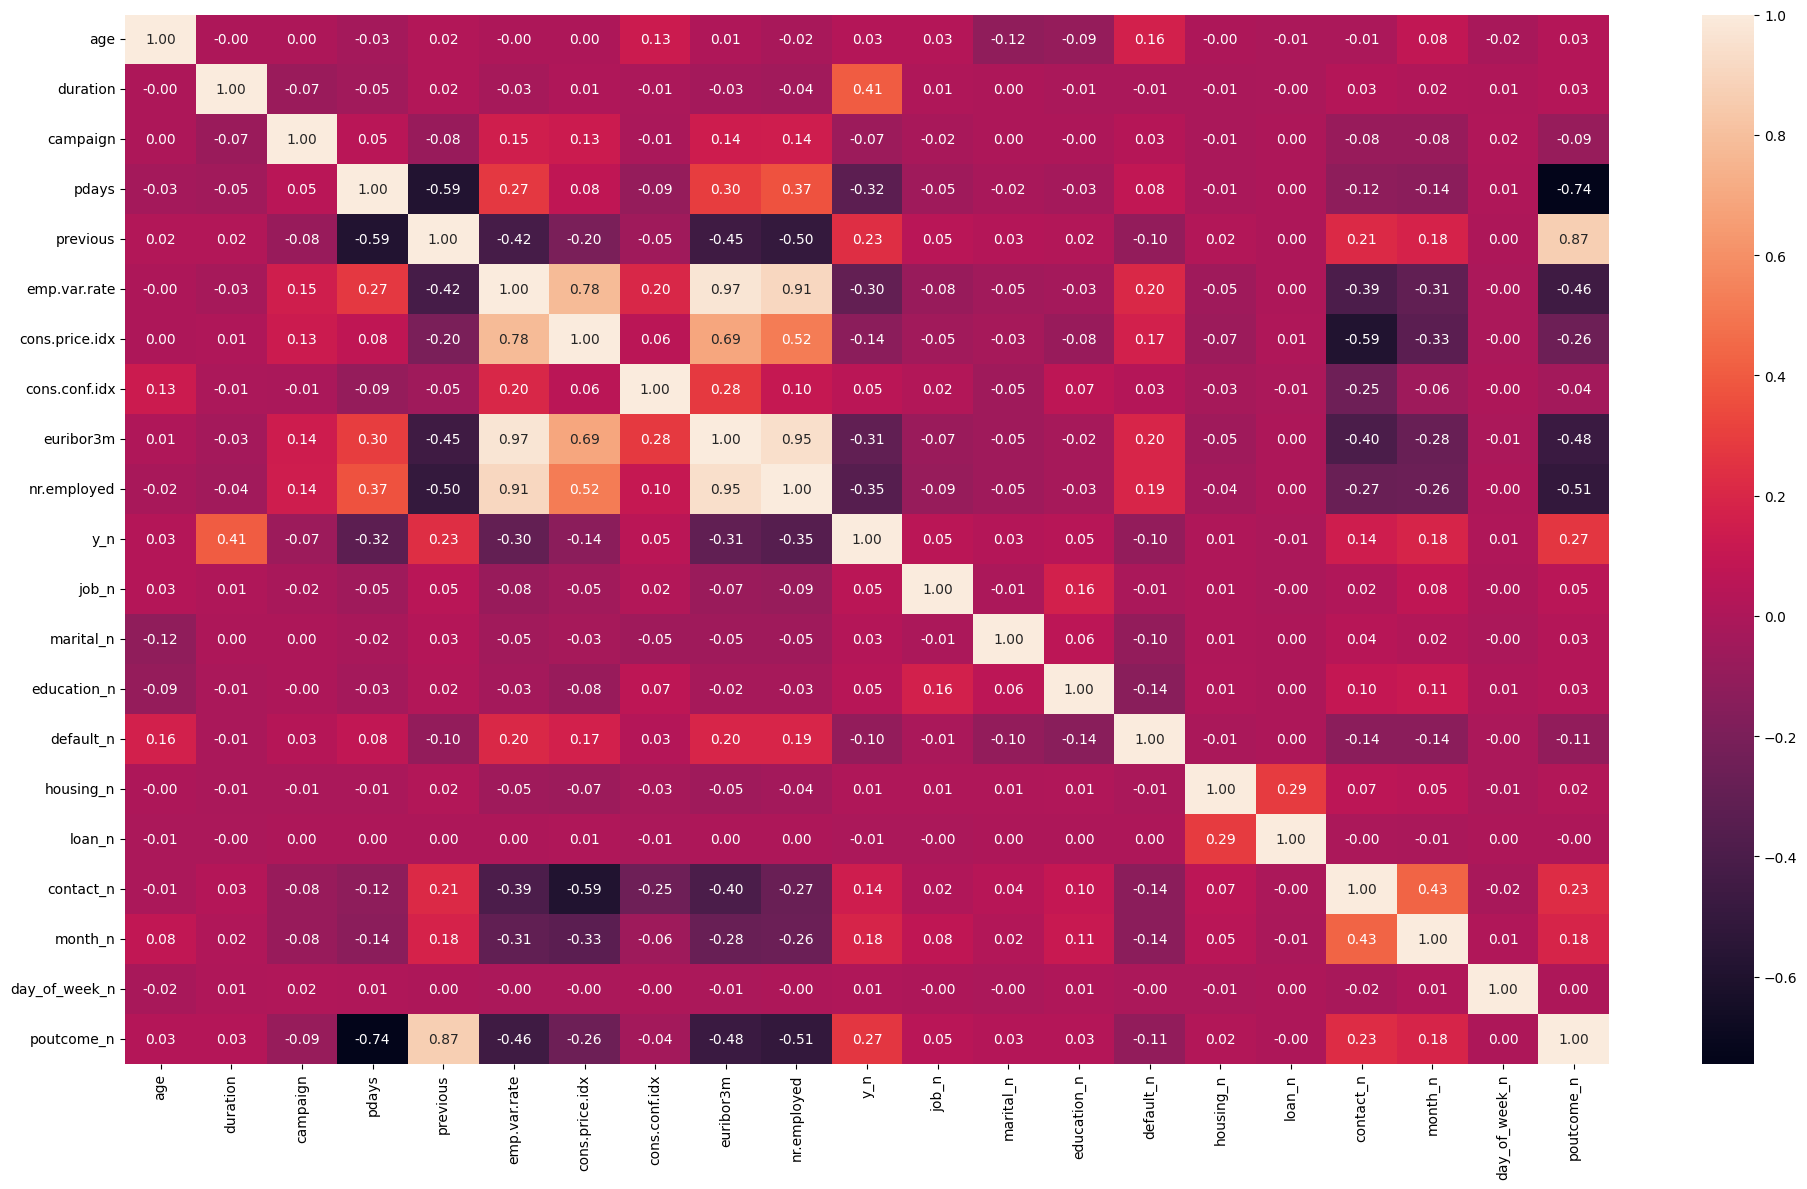

In [11]:
fig, axis = plt.subplots(figsize = (20, 12))

sns.heatmap(df[["age", "duration", "campaign", "pdays", "previous", "emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y_n","job_n","marital_n","education_n","default_n","housing_n","loan_n","contact_n","month_n","day_of_week_n","poutcome_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Para nuestra variable objetivo ("y") la mayor correlacion esta con la duracion del contacto anterior ("duration"), seguido de numero de empleados ("n_employed") tiempo transcurrido desde el ultimo contacto ("pdays") y la tasa de empleo ("emp.var.rate"), los tres inversamente correlacionados.

In [12]:
df.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_n               0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
poutcome_n        0
dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler
#Normalizado
n_list = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','job_n','marital_n','education_n','default_n','housing_n','loan_n','contact_n','month_n','day_of_week_n','poutcome_n','y_n']

scaler= MinMaxScaler()
variables_escaladas = scaler.fit_transform(df[n_list])
df_escalado = pd.DataFrame(variables_escaladas,index=df.index,columns=n_list)
df_escalado


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.142857,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.142857,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.285714,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,0.0,0.142857,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,0.571429,0.0,0.5,0.0,1.0,0.555556,1.0,0.0,1.0
41172,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,0.571429,0.0,0.0,0.0,1.0,0.555556,1.0,0.0,0.0
41173,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,0.857143,0.0,0.5,0.0,1.0,0.555556,1.0,0.0,0.0
41174,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,0.0,0.571429,0.0,0.0,0.0,1.0,0.555556,1.0,0.0,1.0


In [25]:
#Seleccion de caracteristicas
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest

X = df_escalado.drop('y_n',axis=1)
y = df_escalado['y_n']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

columnas_seleccionadas = SelectKBest(chi2,k=16)
columnas_seleccionadas.fit(X_train,y_train)
ix = columnas_seleccionadas.get_support()

X_train_sel = pd.DataFrame(columnas_seleccionadas.transform(X_train),columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(columnas_seleccionadas.transform(X_test),columns=X_test.columns.values[ix])

X_train_sel

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,contact_n,month_n,poutcome_n
0,0.058154,0.036364,1.0,0.000000,1.000000,0.669135,0.338912,0.980503,1.000000,0.909091,0.000000,0.285714,0.0,0.0,0.222222,0.0
1,0.036194,0.090909,1.0,0.000000,1.000000,0.882307,0.376569,0.958966,1.000000,0.181818,0.333333,0.857143,0.0,0.0,0.111111,0.0
2,0.020943,0.054545,1.0,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,0.181818,0.333333,0.857143,0.0,1.0,0.333333,0.0
3,0.027450,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,0.181818,0.333333,0.857143,0.0,0.0,0.000000,0.0
4,0.084994,0.000000,1.0,0.000000,0.333333,0.269680,0.192469,0.148946,0.512287,0.272727,0.333333,0.142857,0.5,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32935,0.020333,0.018182,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0.272727,0.000000,0.428571,0.0,0.0,0.000000,0.0
32936,0.024400,0.000000,1.0,0.000000,1.000000,0.882307,0.376569,0.980957,1.000000,0.181818,0.000000,0.428571,0.0,0.0,0.111111,0.0
32937,0.050834,0.018182,1.0,0.285714,0.000000,0.089634,1.000000,0.027205,0.203781,0.454545,0.000000,0.000000,0.0,1.0,0.444444,0.5
32938,0.059984,0.018182,1.0,0.000000,0.937500,0.698753,0.602510,0.957153,0.859735,0.545455,0.000000,0.857143,0.0,0.0,0.000000,0.0


In [ ]:
#Guardar datos en archivo (agregar variable objetivo a X_train_sel y X_test_sel)

#Escribir CSV
#Leer CSV
#Armar X e y de train y de test


In [26]:
#Crear el modelo
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sel,y_train)


LogisticRegression()

In [27]:
#Predicciones
y_predict = model.predict(X_test_sel)
y_predict

array([1., 0., 0., ..., 0., 0., 0.])

In [28]:
#Medir modelo
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9025012141816415

In [29]:
#Creacion de Grid (copiado del modulo de clase)
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

#Obtener los mejores parametros (copiar def warn)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


In [31]:
#Declarar modelo
model_hyper = LogisticRegression(C=0.001,penalty=None,solver='newton-cg')
model_hyper.fit(X_train_sel,y_train)

y_pred2 = model_hyper.predict(X_test_sel)
accuracy_score(y_test,y_pred2)

0.9028654686741137